Data exploration of INSPIRE, a publicly available research dataset for perioperative medicine

In this script data exploration and analysis of ""diagnosis.csv" is shown

link: https://physionet.org/content/inspire/0.1/

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import datasets  # Example, importing datasets module
import tensorflow as tf
import torch
import keras
import scipy
import statsmodels

print("Libraries Imported")


Libraries Imported


In [2]:
df_diagnosis = pd.read_csv('C:\\Users\\20181588\\Desktop\\data\\inspire-a-publicly-available-research-dataset-for-perioperative-medicine-1.0\\inspire-a-publicly-available-research-dataset-for-perioperative-medicine-1.0\\diagnosis.csv')

In [3]:
df_diagnosis.head()


,subject_id,chart_time,icd10_cm
0,190852492,325440,R06
1,190852492,325440,G20
2,142367193,0,I61
3,142367193,658080,E11
4,142367193,658080,G44


In [4]:
df_diagnosis.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4733046 entries, 0 to 4733045
Data columns (total 3 columns):
 #   Column      Dtype 
---  ------      ----- 
 0   subject_id  int64 
 1   chart_time  int64 
 2   icd10_cm    object
dtypes: int64(2), object(1)
memory usage: 108.3+ MB


In [5]:
unique_icd10_cm_values = df_diagnosis['icd10_cm'].unique()
print(unique_icd10_cm_values)

['R06' 'G20' 'I61' ... 'A85' 'J99' 'S07']


In [6]:
unique_icd10_cm_values = df_diagnosis['icd10_cm'].unique()
print(unique_icd10_cm_values[:30])

['R06' 'G20' 'I61' 'E11' 'G44' 'R25' 'R51' 'A16' 'J98' 'R55' 'R35' 'S02'
 'T84' 'S73' 'N18' 'Z94' 'C18' 'S42' 'C50' 'D05' 'R05' 'N30' 'R50' 'J06'
 'K29' 'S72' 'R52' 'S52' 'N40' 'R33']


In [7]:
top_10_icd10_cm = df_diagnosis['icd10_cm'].value_counts().head(30)
print(top_10_icd10_cm)

icd10_cm
C50    267313
N18    195865
C16    108251
E14     99653
H26     97693
E78     97131
I10     90988
C18     89839
C34     78714
Z94     71332
C22     68677
C73     67184
H35     62953
H40     60545
R52     59472
C20     53982
I20     51221
K29     48470
E11     48051
E04     46822
C61     42146
M48     41808
K21     41762
N40     39689
N64     35538
C67     34216
D25     32687
I48     30687
N83     30519
H04     28582
Name: count, dtype: int64


C50: Malignant neoplasm of breast
N18: Chronic kidney disease (CKD)
C16: Malignant neoplasm of the stomach
E14: Unspecified diabetes mellitus
H26: Other cataract
E78: Disorders of lipoprotein metabolism and other lipidemias
I10: Essential (primary) hypertension
C18: Malignant neoplasm of the colon
C34: Malignant neoplasm of bronchus and lung
Z94: Presence of transplanted organ and tissue
C22: Malignant neoplasm of liver and intrahepatic bile ducts
C73: Malignant neoplasm of the thyroid gland
H35: Other retinal disorders
H40: Glaucoma
R52: Pain, not elsewhere classified
C20: Malignant neoplasm of the rectum
I20: Angina pectoris
K29: Gastritis and duodenitis
E11: Type 2 diabetes mellitus
E04: Other non-toxic goiter
C61: Malignant neoplasm of the prostate
M48: Other spondylopathies
K21: Gastro-esophageal reflux disease
N40: Hyperplasia of the prostate
N64: Disorders of the breast, not elsewhere classified
C67: Malignant neoplasm of the bladder
D25: Leiomyoma of the uterus
I48: Atrial fibrillation and flutter
N83: Noninflammatory disorders of the ovary, fallopian tube, and broad ligament
H04: Disorders of the lacrimal system

C:\Users\20181588\AppData\Local\Temp\ipykernel_21900\3205744819.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=top_10_icd10_cm.index, y=top_10_icd10_cm.values, palette="viridis")


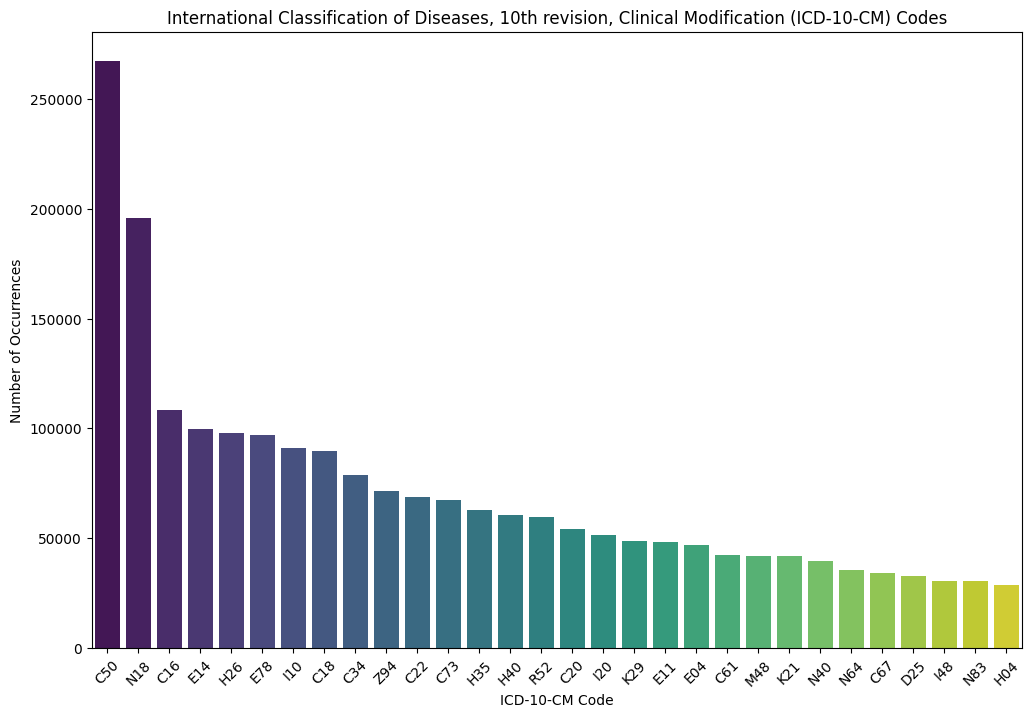

In [8]:

# Plotting the top 10 ICD-10-PCS codes
plt.figure(figsize=(12, 8))
sns.barplot(x=top_10_icd10_cm.index, y=top_10_icd10_cm.values, palette="viridis")
plt.xticks(rotation=45)
plt.title("International Classification of Diseases, 10th revision, Clinical Modification (ICD-10-CM) Codes")
plt.ylabel("Number of Occurrences")
plt.xlabel("ICD-10-CM Code")
plt.show()

In [9]:
#check which subject had multiple diagnoses
top_subject_id= df_diagnosis['subject_id'].value_counts().head(30)
print(top_subject_id)

subject_id
171623622    5076
156395380    4836
171958003    4027
162680034    3560
193988404    3543
136917112    2962
190852492    2723
196808860    2647
103392702    2637
116012853    2482
140987440    2129
173455490    2045
129213220    1940
143934173    1859
155759933    1694
197676281    1688
154971752    1563
183368773    1528
140778301    1473
130903941    1427
103166491    1415
123085872    1412
191191533    1354
110659561    1349
198978000    1212
148741814    1191
163406604    1161
116039971    1125
150998832    1090
145195143    1067
Name: count, dtype: int64


In [10]:
#check which subject had multiple diagnoses
top_subject_id= df_diagnosis['subject_id'].value_counts().tail(30)
print(top_subject_id)

subject_id
128372761    1
180387390    1
112053241    1
143422770    1
151344751    1
150234271    1
176198281    1
187724752    1
194440072    1
175189804    1
181411103    1
138280213    1
149878451    1
165622950    1
134880530    1
131940070    1
193506022    1
100563083    1
156195190    1
173479702    1
195666670    1
170405991    1
199026581    1
172621783    1
192379230    1
139312784    1
129524613    1
104675571    1
153098861    1
145239503    1
Name: count, dtype: int64


In [11]:
unique_chart_time = df_diagnosis['chart_time'].unique()
print(unique_chart_time[:30])

[ 325440       0  658080   80640    1440   -1440 -156960  -41760   -5760
 -110880   20160  -40320   83520  144000  159840  823680  911520 1334880
 1339200  -24480 -256320  796320  100800  948960 1258560 1774080 1188000
   24480  273600  303840]


In [12]:
unique_subject_id = df_diagnosis['subject_id'].unique()
print(unique_subject_id[:30])

[190852492 142367193 178346414 128748700 109644621 172098362 117033203
 189240010 121299142 140788534 170001893 144464483 197356761 129028203
 149650122 162084742 121839981 192477153 193838042 195452213 118735512
 104550663 104495240 140464442 195768734 149912663 147682702 131034901
 198544171 100880723]


In [13]:
df_diagnosis.describe()

,subject_id,chart_time
count,4.733046e+06,4.733046e+06
mean,1.501308e+08,1.079468e+06
std,2.885684e+07,1.221519e+06
min,1.000008e+08,-2.592000e+05
25%,1.251906e+08,6.768000e+04
50%,1.501546e+08,6.220800e+05
75%,1.749923e+08,1.784160e+06
max,1.999994e+08,7.457760e+06


In [14]:
df_diagnosis.columns

Index(['subject_id', 'chart_time', 'icd10_cm'], dtype='object')